In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.stats import norm
import scipy.stats as st
import math 

**2.1**

In [2]:
from scipy.stats import binom

In [11]:
# P(X >= 17)
1 - binom.cdf(16, 1000, 0.01, loc=0)

0.026391035409614738

In [108]:
#Randomly generate 10,000 samples of F as F follows standard normal distribution
mu, sigma = 0, 1
F_sample = np.random.normal(mu, sigma, 10000)

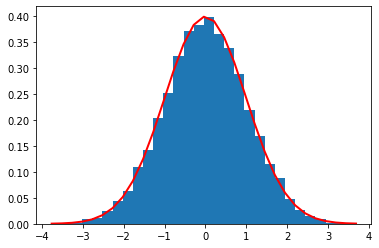

In [109]:
count, bins, ignored = plt.hist(F_sample, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [110]:
PD = 0.01
Pu_total=[]
for i in range(0, 9, 1):
    p = i / 10
    print(p)
    Pr = norm.cdf((norm.ppf(PD) - np.sqrt(p) * F_sample)/np.sqrt(1 - p)) #Probability of 1 turbine failure
    Pu = 1 - binom.cdf(2, 102, Pr, loc=0) #Probability of >= 3 turbines fail
    Pu_total.append(np.average(Pu))

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8


In [111]:
np.shape(Pu_total)

(9,)

In [116]:
print('The probability of power outage, or Pr(number of working turbines < 100) values are:')
Pu_total

The probability of power outage, or Pr(number of working turbines < 100) values are:


[0.08308898511056029,
 0.12120824752164626,
 0.12696702890850564,
 0.12177476280931948,
 0.11199066307504149,
 0.09988755516455056,
 0.08634118433132605,
 0.07165876854292016,
 0.05580119047799634]

**2.2**

In [105]:
PD = 0.01
Pu_max = []
N_value = []
for N in range(101, 1001):
    Pu_total=[]
#     F_sample = np.random.normal(mu, sigma, 10000)
    for i in range(0, 9, 1):
        p = i / 10
#         print(p)
        Pr = norm.cdf((norm.ppf(PD) - np.sqrt(p) * F_sample)/np.sqrt(1 - p)) #Probability of 1 turbine failure
        Pu = 1 - binom.cdf(N - 100, N, Pr, loc=0) #Probability of more than 3 turbines fail
        Pu_total.append(np.average(Pu))
    Pu_max.append(np.amax(Pu_total))
    N_value.append(N)

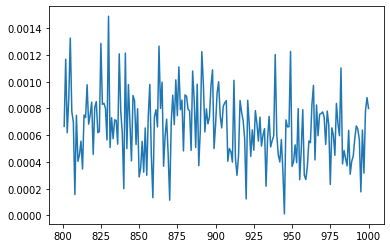

In [98]:
# Results when F_sample is generated every N value
plt.plot(N_value[700:], Pu_max[700:])
plt.show()

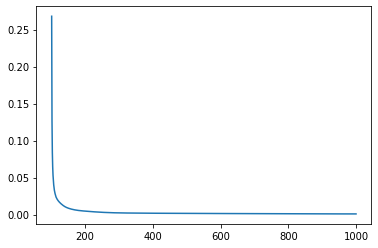

In [106]:
# Results when F_sample is generated once
plt.plot(N_value, Pu_max)
plt.show()

In [100]:
next(x for x, val in enumerate(Pu_max) if val <= 0.001)

709

In [102]:
Pu_max[700:720]

[0.00101768857612614,
 0.0010155545618196122,
 0.0010134259391671025,
 0.0010113029222776433,
 0.0010091857232185652,
 0.0010070745519633125,
 0.0010049696163398913,
 0.0010028711219803664,
 0.00100077927227097,
 0.0009986942683031144,
 0.0009966163088252636,
 0.0009945455901956804,
 0.0009924823063360057,
 0.000990426648685832,
 0.00098837880615813,
 0.0009863389650956332,
 0.0009843073092282368,
 0.0009822840196312107,
 0.0009802692746846257,
 0.000978263250033623]

In [103]:
np.amin(Pu_max)

0.0008003007982629988

In [113]:
print('The least N so that the probability of power outage is at most 0.1% when p ranges from 0 to 0.8 is: ')
N_value[709]

The least N so that the probability of power outrage is at most 0.1% when p ranges from 0 to 0.8 is: 


810

In [115]:
print('The max probability of power outage when N = 810 and when p ranges from 0 to 0.8 is: ', Pu_max[709] * 100, '%')


The max probability of power outrage when N = 810 and when p ranges from 0 to 0.8 is:  0.09986942683031144 %
